In [2]:
import numpy as np

In [3]:
filename = '001_ServoCurveData_0000.nta'

f = open(filename,'r')

lines = f.readlines()

In [4]:
lines[:30]

['%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n',
 '%%    Created by Servo Tracker 4.0 \n',
 '%%    2010-10-12 15:33:49\n',
 '%%    SW Compilation date and time: Jan 15 2009 15:53:31\n',
 '%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n',
 '% Data logged using the program version shown below\n',
 '% Application Name: Servo Tracker\n',
 '% Version: 4.0 \n',
 '% Build: Jan 15 2009 / 15:53:31\n',
 '%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n',
 '% Data logged from Servo-i hw/sw as shown below\n',
 '% Servo-i,004,-,001\n',
 '% Breathing system: 18.14.00\n',
 '% Monitoring: 18.14.01\n',
 '% Panel: 18.14.00\n',
 '% ExpFlowMeter: 18.14.00\n',
 '% CIE: 18.14.01\n',
 '%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n',
 '% Reference Time, Servo-i: 2010/10/11 14:40:03 PC: 2010/10/11 15:42:41\n',
 '%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n',
 '

#### Prendiamo solo le line che non iniziano con % e ognuna la dividiamo in 8 usando il tab come delimitatore, togliendo il newline al fine riga.

In [5]:
data = []
for line in lines:
    if not line.startswith('%'):
        data.append(line.replace('\n','').split('\t',8))

In [6]:
np.shape(data)

(65472, 8)

#### Codice per trasformare i dati in un array di float tenendo solo le colonne dalla posizione 4 alla 7 comprese.

In [7]:
v = np.ndarray(shape=(len(data),4),dtype=float)
for i in range(len(data)):
    for j in range(3,7):

        v[i-3,j-3]=float(data[i][j])

In [8]:
np.shape(v)

(65472, 4)

#### Ora dobbiamo dividere i singoli atti respiratori sfruttando la prima colonna composta di 0 e 1. 0 e' inspirio 1 e' espirio. Quindi quando si passa da 1 a 0 si deve dividere la sequenza.

In [9]:
x = [0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0]

In [10]:
np.diff(x)

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  1, -1])

In [11]:
np.diff(x) == 1

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False], dtype=bool)

#### Con la funzione numpy ```nonzero``` [Numpy nonzero](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.nonzero.html) otteniamo la lista degli indici nei quali l'array non e' zero.

In [12]:
np.nonzero(np.diff(x) == 1)

(array([ 4, 12, 24]),)

#### L'output e' un po' strano quindi prendiamo il primo elemento che e' esattament el'array richiesto

In [13]:
np.nonzero(np.diff(x) == 1)[0]

array([ 4, 12, 24])

#### E spostiamo a destra di una posizione per ottenere le esatte posizioni nelle quali abbiamo il cambio da 1 a 0.

In [14]:
np.nonzero(np.diff(x) == 1)[0] + 1

array([ 5, 13, 25])

In [15]:
np.split(x, np.nonzero(np.diff(x) == 1)[0]+1)

[array([0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 0, 0, 0]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0])]

#### Ovviamente una volta che abbiamo gli indici possiamo splittare qualsiasi array .

In [16]:
stato = v[:,0] # Stato 0 inspirio - Stato 1 espirio
pressione = v[:,1] # Pressione
flusso = v[:,2] # Flusso
eadi = v[:,3] # EaDI

In [19]:
index = np.nonzero(np.diff(stato)==1)[0]+1
index

168

In [25]:
np.split(stato,index)[1]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

#### Per salvare i dati usiamo le Series di Pandas

In [26]:
import pandas as pd

In [27]:
data_pressione = np.split(pressione,index)

In [28]:
ts_pressione = pd.Series(data_pressione)

In ogni riga della struttura dati Series di Pandas viene salvato una serie tempoprale e di fatto ogni riga ha lunghezza variabile.

In [40]:
for i in range(1,10):
    print len(data_pressione[i])

415
442
343
414
429
428
834
428
370


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

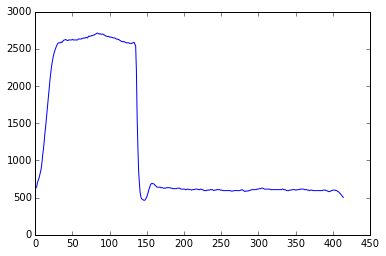

In [38]:
plt.plot(ts_pressione[1])